In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install theano
!pip install arviz

In [3]:
!pip install --upgrade https://github.com/Theano/Theano/archive/master.zip
!pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip

     \ 23.5MB 705kB/s
  Created wheel for Theano: filename=Theano-1.0.4+unknown-cp36-none-any.whl size=2666483 sha256=ca36b292d67745906cb8975b7ebc94fab2bce6b3db0f61ecc3ff2f0959c9d80c
  Stored in directory: /tmp/pip-ephem-wheel-cache-nmafv0l_/wheels/33/73/96/0ed263c62a86e2485ea634e0d3ae8169d50fd66e3b252541db
Successfully built Theano
  Found existing installation: Theano 1.0.4+unknown
    Uninstalling Theano-1.0.4+unknown:
      Successfully uninstalled Theano-1.0.4+unknown
     | 1.3MB 1.2MB/s
  Created wheel for Lasagne: filename=Lasagne-0.2.dev1-cp36-none-any.whl size=122798 sha256=883d8c29f18d0c58fcd111489484d4ae7ddadee0b1a303c57a23db8308dfb8e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-dteuc79u/wheels/ca/4a/00/87f1777b229481fe76562df7c0cfb993bc88ed0cc37e3f0ed4
Successfully built Lasagne
  Found existing installation: Lasagne 0.2.dev1
    Uninstalling Lasagne-0.2.dev1:
      Successfully uninstalled Lasagne-0.2.dev1


In [0]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import pymc3 as pm
import matplotlib.pyplot as plt

In [0]:
import theano
tmp = theano.config.blas.ldflags
#theano.config.blas.ldflags = '-L/Users/bara947/.local/intelpython3/envs/u18fest_env/lib -lmkl_rt -lpthread -lm -lm -Wl'

In [0]:
npr.seed(0)

In [0]:
x1 = np.array([1300, 1300, 1300, 1300, 1300, 1300, 1200, 1200, 1200, 1200, 1200, 1200, 1100, 1100, 1100, 1100])
x2 = np.array([7.5, 9.0, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 17.0])
x3 = np.array([0.0120, 0.0120, 0.0115, 0.0130, 0.0135, 0.0120, 0.0400, 0.0380, 0.0320, 0.0260, 0.0340, 0.0410, 0.0840, 0.0980, 0.0920, 0.0860])
yobs = np.array([49.0, 50.2, 50.5, 48.5, 47.5, 44.5, 28.0, 31.5, 34.5, 35.0, 38.0, 38.5, 15.0, 17.0, 20.5, 19.5])

In [0]:
normalize = lambda x : (x - np.mean(x)) / np.std(x)

x1n = normalize(x1)
x2n = normalize(x2)
x3n = normalize(x3)

In [0]:
X = np.vstack([x1, x2, x3, x1*x2, x1*x3, x2*x3, x1**2, x2**2, x3**2])

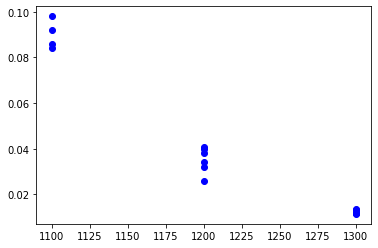

In [10]:
plt.plot(x1, x3, 'bo')

In [0]:
Xn = np.vstack([x1n, x2n, x3n, x1n*x2n, x1n*x3n, x2n*x3n, x1n**2, x2n**2, x3n**2])
# Xn = np.vstack([x1n, x2n, x3n, x1n*x2n, x2n*x3n])

In [0]:
model = pm.Model()
with model:
    alpha = pm.Flat('alpha')
    # alpha = pm.Normal('alpha', mu=0, sd=10)
    
    # tau = pm.HalfNormal('tau', sd=1)
    # tau = pm.HalfStudentT('tau', nu=4, sd=1)
    
    # xi  = pm.Bernoulli('xi', 0.5, shape=Xn.shape[0])
    
    nu = pm.Gamma('nu', alpha=2, beta=0.1)
    
    # beta  = pm.Flat('beta', shape=Xn.shape[0])
    # beta  = pm.Normal('beta', mu=0, sd=1, shape=Xn.shape[0])
    # beta  = pm.Normal('beta', mu=0, sd=tau, shape=Xn.shape[0])
    # beta  = pm.Cauchy('beta', alpha=0, beta=1, shape=Xn.shape[0])
    beta  = pm.StudentT('beta', nu=nu, mu=0, sd=1, shape=Xn.shape[0])
    
    # bb = pm.Deterministic('bb', xi * beta)
    
    sigma = pm.HalfNormal('sigma', sd=1)
    # sigma = pm.HalfCauchy('sigma', beta=1)
    # sigma = pm.HalfFlat('sigma')
    
    mu    = alpha + pm.math.dot(beta, Xn)
    # mu    = alpha + pm.math.dot(bb, Xn)
    
    y     = pm.Normal('y', mu=mu, sd=sigma, observed=yobs)
    # y     = pm.Normal('y', mu=mu, sd=1, observed=yobs)

In [13]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, nu, alpha]
100%|██████████| 1500/1500 [00:09<00:00, 155.01it/s]
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [14]:
pm.summary(trace)

/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,36.310439,1.132662,0.041662,34.128305,38.634320,767.446671,0.999522
beta__0,10.649466,1.774910,0.077104,6.671982,13.635644,564.215102,0.999554
beta__1,1.368551,0.554556,0.015477,0.245897,2.416523,1377.651805,0.999716
beta__2,-0.804083,1.995880,0.095167,-5.278708,2.392107,451.423139,0.999500
beta__3,-2.619246,2.245431,0.112959,-7.780655,0.541153,224.483728,1.027100
beta__4,0.090204,1.106095,0.032825,-2.018173,2.344111,1020.846143,0.999581
beta__5,-1.299237,2.371348,0.117581,-7.199176,1.758800,239.801668,1.027146
beta__6,-0.157660,1.043551,0.031922,-2.193913,2.031692,1102.737584,1.007893
beta__7,-0.563665,0.514728,0.015689,-1.543809,0.468026,1101.878379,0.999647
beta__8,0.254287,1.007952,0.035164,-1.630723,2.435173,927.504446,1.006291


/usr/local/lib/python3.6/dist-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


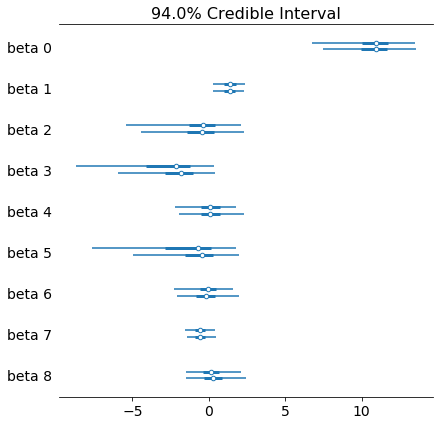

In [15]:
pm.forestplot(trace, varnames=['beta']);
#pm.traceplot(trace);

In [0]:
#pm.plot_posterior(trace);

In [17]:
nppc = 100
ppc  = pm.sample_posterior_predictive(trace, samples=nppc, model=model)

100%|██████████| 100/100 [00:01<00:00, 63.50it/s]


In [18]:
ppc['y'].shape

(100, 16)

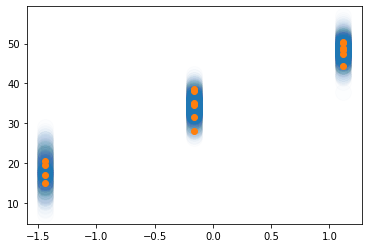

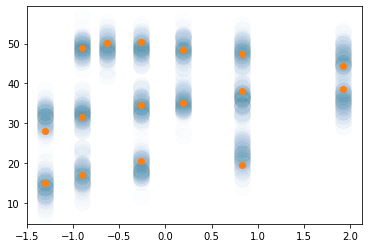

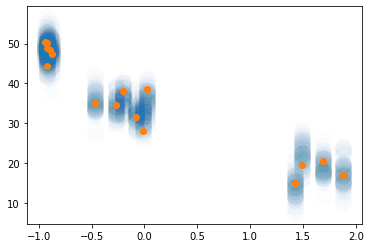

In [19]:
plt.scatter(np.tile(x1n, (nppc, 1)), ppc['y'], alpha=0.01, s=250)
plt.scatter(x1n, yobs)
plt.show()

plt.scatter(np.tile(x2n, (nppc, 1)), ppc['y'], alpha=0.01, s=250)
plt.scatter(x2n, yobs)
plt.show()

plt.scatter(np.tile(x3n, (nppc, 1)), ppc['y'], alpha=0.01, s=250)
plt.scatter(x3n, yobs)
plt.show()

In [20]:
print(pm.waic(trace, model=model))

WAIC_r(WAIC=78.0524767638026, WAIC_se=6.924052842397157, p_WAIC=8.084701808650847, var_warn=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:219: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


In [0]:
xe1 = 1300
xe2 = 7.5
xe3 = 0.098
xen1 = (xe1 - x1.mean()) / x1.std()
xen2 = (xe2 - x2.mean()) / x2.std()
xen3 = (xe3 - x3.mean()) / x3.std()

Xen  = np.vstack([xen1, xen2, xen3, xen1*xen2, xen1*xen3, xen2*xen3, xen1**2, xen2**2, xen3**2])
# Xen  = np.vstack([xen1, xen2, xen3, xen1*xen2, xen2*xen3])

In [0]:
ye = np.zeros(100)
for i in range(100):
    ye[i] = trace['alpha'][i] + np.dot(trace['beta'][i], Xen)

(0, 100)

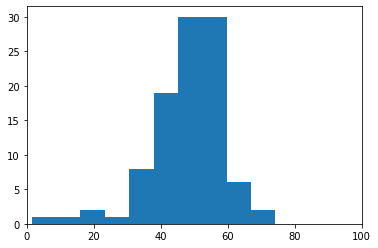

In [23]:
plt.hist(ye)
plt.xlim([0, 100])